In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
games_Medal = pd.read_csv('Dataset/Olympic_Games_Medal_Tally.csv', sep=',', encoding_errors='replace')
games_Medal = games_Medal.replace(["na"], None)

games_Medal = games_Medal[games_Medal["edition"].str.contains("Winter") == False]   # apenas jogos de verao

df = pd.DataFrame(games_Medal["country"].unique(), columns=["country"])

gold = games_Medal.groupby('country')['gold'].sum()
silver = games_Medal.groupby('country')['silver'].sum()
bronze = games_Medal.groupby('country')['bronze'].sum()

df = pd.merge(df, gold, on='country', how='left')
df = pd.merge(df, silver, on='country', how='left')
df = pd.merge(df, bronze, on='country', how='left')


# CLEANING DATA

df = df[df["country"].str.contains("Mixed team")==False] # Impossivel dividir
df = df[df["country"].str.contains("Unified Team")==False] # Impossivel dividir
df = df[df["country"].str.contains("Individual Olympic Athletes")==False] # Impossivel dividir
df = df[df["country"].str.contains("Bohemia")==False]    # Eslováquia + Republica Checa
df = df[df["country"].str.contains("Australasia")==False]    # Australia + Nova Zelandia + Nova Guine + partes da Indonesia
df = df[df["country"].str.contains("Czechoslovakia")==False]    # Eslováquia + Republica Checa
df = df[df["country"].str.contains("Yugoslavia")==False] # Bosnia + Croacia + Macedonia + Montenegro + Eslovenia + Servia
df = df[df["country"].str.contains("Soviet Union")==False] # Russia + Letonia + Lituania + Estonia + Georgia + Armenia + Azerbaijao + Bielorrussia + Cazaquistao + Moldavia + Quirguistao + Tajiquistao + Turquemenistao + Ucrania + Usbequistao
df = df[df["country"].str.contains("United Arab Republic")==False]  # Egypt + Syria + Faixa de Gaza
df = df[df["country"].str.contains("West Indies Federation")==False] # Antigua + Barbados + Cayman Islands + Dominica + Grenada + Jamaica + Montserrat + St Christopher-Nevis-Anguilla + Saint Lucia	+ St Vincent and the Grenadines	+ Trinidad and Tobago + Turks and Caicos Islands	

df["country"] = df["country"].replace('Türkiye', 'Turkey')

df.loc[df['country'] == "Germany", ['gold']] += df.loc[df['country'] == "West Germany", ['gold']].values[0][0]
df.loc[df['country'] == "Germany", ['gold']] += df.loc[df['country'] == "East Germany", ['gold']].values[0][0]
df.loc[df['country'] == "Germany", ['silver']] += df.loc[df['country'] == "West Germany", ['silver']].values[0][0]
df.loc[df['country'] == "Germany", ['silver']] += df.loc[df['country'] == "East Germany", ['silver']].values[0][0]
df.loc[df['country'] == "Germany", ['bronze']] += df.loc[df['country'] == "West Germany", ['bronze']].values[0][0]
df.loc[df['country'] == "Germany", ['bronze']] += df.loc[df['country'] == "East Germany", ['bronze']].values[0][0]
df = df[df["country"].str.contains("West Germany")==False]
df = df[df["country"].str.contains("East Germany")==False]

df.loc[df['country'] == "People's Republic of China", ['gold']] += df.loc[df['country'] == "Hong Kong, China", ['gold']].values[0][0]
df.loc[df['country'] == "People's Republic of China", ['silver']] += df.loc[df['country'] == "Hong Kong, China", ['silver']].values[0][0]
df.loc[df['country'] == "People's Republic of China", ['bronze']] += df.loc[df['country'] == "Hong Kong, China", ['bronze']].values[0][0]
df = df[df["country"].str.contains("Hong Kong, China")==False]

df.loc[df['country'] == "Russian Federation", ['gold']] += df.loc[df['country'] == "ROC", ['gold']].values[0][0]
df.loc[df['country'] == "Russian Federation", ['silver']] += df.loc[df['country'] == "ROC", ['silver']].values[0][0]
df.loc[df['country'] == "Russian Federation", ['bronze']] += df.loc[df['country'] == "ROC", ['bronze']].values[0][0]
df = df[df["country"].str.contains("ROC")==False]

#df = df[df["total"] > 5]

display(df)

,country,gold,silver,bronze
0,United States,1069,842,744
1,Greece,36,45,41
2,Germany,446,460,498
3,France,231,256,285
4,Great Britain,291,324,313
...,...,...,...,...
147,Jordan,1,1,1
148,Kosovo,3,0,0
150,San Marino,0,1,2
151,Turkmenistan,0,1,0


In [87]:
import plotly.graph_objects as go

colors = ['#D6AF36', '#A7A7AD', '#A77044']

def medals_type(country):

    goldv = df.loc[(df['country'] == country), 'gold'].values[0]
    silverv = df.loc[(df['country'] == country), 'silver'].values[0]
    bronzev = df.loc[(df['country'] == country), 'bronze'].values[0]

    fig = go.Figure(data=[go.Pie(labels=['Gold','Silver','Bronze'],
                                values=[goldv,silverv,bronzev])])                       
    fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                    marker=dict(colors=colors, line=dict(color='#000000', width=1)))
    fig.update_layout(font_family= 'Cabin',autosize = False, width = 300, height = 172, 
                      legend=dict(yanchor="top", xanchor="left", font=dict(size=15)),
                      margin=dict(l=1, r=2, b=20, t=31, pad=0),
                      title={
                        'text': "<b>Medals</b>",
                        'y':0.9,
                        'x':0.15,
                        'xanchor': 'center',
                        'yanchor': 'top'})

    fig.show()

medals_type("Portugal")

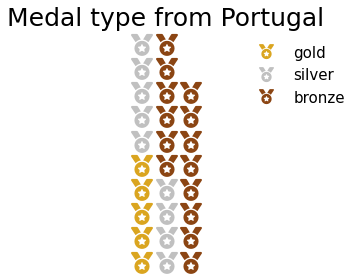

In [5]:
from pywaffle import Waffle

def medals_type2(country):

    colors = ['GoldenRod', 'Silver', 'SaddleBrown']

    goldv = df.loc[(df['country'] == country), 'gold'].values[0]
    silverv = df.loc[(df['country'] == country), 'silver'].values[0]
    bronzev = df.loc[(df['country'] == country), 'bronze'].values[0]

    dic = {'gold': goldv, 'silver': silverv, 'bronze': bronzev}

    fig = plt.figure(FigureClass=Waffle,
                    values=dic,
                    rows=10,
                    colors=colors,
                    icons=['medal', 'medal', 'medal'],
                    font_size=22,
                    icon_legend=True,
                    legend={'bbox_to_anchor': (1.55, 1), 'fontsize': 15, 'frameon': False, 'loc': 'upper left'})
    plt.title('Medal type from ' + country, fontsize=25)
    plt.show()

medals_type2("Portugal")

In [9]:
import plotly.express as px

def medals_type3(country):

    colors = ['GoldenRod', 'Silver', 'SaddleBrown']

    fig = go.Figure(data=[go.Bar(
        fig
        x=['Gold', 'Silver', 'Bronze'],
        y=[df.loc[(df['country'] == country), 'gold'].values[0], df.loc[(df['country'] == country), 'silver'].values[0], df.loc[(df['country'] == country), 'bronze'].values[0]],
        marker_color=colors # marker color can be a single color value or an iterable
    )]) 
    
    fig.show()

medals_type3("Portugal")
